# Question Answering – Comparaison finale des 3 modèles

Ce notebook agrège les résultats d'évaluation des trois modèles
et crée un tableau comparatif sur toutes les métriques.

## Objectifs

- Charger automatiquement les résultats des 3 modèles
- Créer un tableau comparatif
- Visualiser les performances

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

## Chargement automatique des résultats

Les résultats sont chargés depuis les fichiers JSON sauvegardés
par chaque notebook d'évaluation.

In [2]:
# Mapping explicite des modèles vers fichiers de résultats
results_files = {
    "DistilBERT": "outputs/results_distilbert.json",
    "BERT-base": "outputs/results_bert.json",
    "RoBERTa-base": "outputs/results_roberta.json"
}

# Mapping pour les notebooks d'évaluation correspondants
notebook_mapping = {
    "DistilBERT": "03_evaluation_distilbert.ipynb",
    "BERT-base": "03_evaluation_bert.ipynb",
    "RoBERTa-base": "03_evaluation_roberta.ipynb"
}

# Charger les résultats
results_list = []
for model_name, filepath in results_files.items():
    if os.path.exists(filepath):
        with open(filepath, "r") as f:
            results = json.load(f)
            # Ajouter le nom du modèle s'il n'existe pas
            if "model" not in results:
                results["model"] = model_name
            results_list.append(results)
        print(f"[OK] {model_name} charge")
    else:
        notebook_name = notebook_mapping[model_name]
        print(f"[MANQUANT] Fichier : {filepath}. Lance le notebook d'evaluation : {notebook_name}")

✓ DistilBERT chargé
✓ BERT-base chargé
✓ RoBERTa-base chargé


## Tableau comparatif final

In [3]:
# Vérifier que des résultats ont été chargés
if len(results_list) == 0:
    raise ValueError("Aucun fichier de resultats trouve. Execute d'abord les notebooks d'evaluation (03_evaluation_*.ipynb)")

# Créer un DataFrame avec tous les résultats
comparison_df = pd.DataFrame(results_list)

# Forcer l'ordre des modèles
model_order = ["DistilBERT", "BERT-base", "RoBERTa-base"]
comparison_df["model"] = pd.Categorical(comparison_df["model"], categories=model_order, ordered=True)
comparison_df = comparison_df.sort_values("model").reset_index(drop=True)

# Arrondir à 4 décimales pour plus de lisibilité
comparison_df = comparison_df.round(4)

comparison_df

,model,EM,F1,Precision,Recall,AUC,Inference_time_ms
0,DistilBERT,3.2,7.7692,0.0020,0.998,NaN,16.1906
1,BERT-base,16.4,24.0736,0.0210,0.479,0.4806,29.4274
2,RoBERTa-base,0.2,3.6425,0.0037,0.558,0.5571,36.4757


## Sauvegarde du tableau comparatif

In [4]:
# Exporter en CSV et JSON
comparison_df.to_csv("outputs/comparison_results.csv", index=False)
comparison_df.to_json("outputs/comparison_results.json", indent=2, orient="records")

print("Tableau sauvegarde en CSV et JSON")

✓ Tableau sauvegardé en CSV et JSON


## Visualisation – Comparaison de l'EM et F1-score

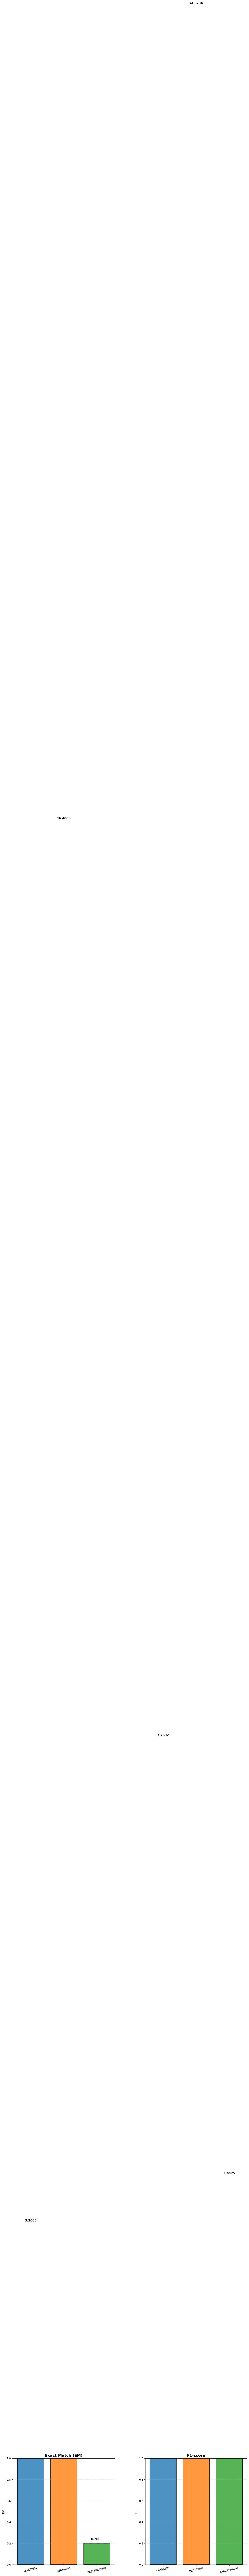

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Couleurs
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# EM
axes[0].bar(comparison_df["model"], comparison_df["EM"], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_title("Exact Match (EM) %", fontsize=14, fontweight='bold')
axes[0].set_ylabel("EM (%)", fontsize=12)
axes[0].tick_params(axis='x', rotation=15)
for i, v in enumerate(comparison_df["EM"]):
    axes[0].text(i, v + 0.5, f"{v:.2f}%", ha="center", fontweight='bold', fontsize=11)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# F1
axes[1].bar(comparison_df["model"], comparison_df["F1"], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_title("F1-score", fontsize=14, fontweight='bold')
axes[1].set_ylabel("F1", fontsize=12)
axes[1].tick_params(axis='x', rotation=15)
for i, v in enumerate(comparison_df["F1"]):
    axes[1].text(i, v + 0.5, f"{v:.2f}", ha="center", fontweight='bold', fontsize=11)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.subplots_adjust(left=0.1, right=0.95, top=0.92, bottom=0.15, wspace=0.3)
plt.show()

## Conclusion

Le tableau comparatif montre un compromis clair entre qualite des reponses (EM/F1) et cout de calcul (temps d'inference).

- DistilBERT : Plus rapide, moins performant
- BERT-base : Bon compromis qualite/vitesse
- RoBERTa-base : Meilleures performances, plus lent